In [1]:
!date

Thu Nov 19 15:01:42 PST 2020


# Sex gene 10x subclass DE 

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import os
import anndata

def nd(arr):
    return np.asarray(arr).reshape(-1)

import sys
sys.path.append('/home/sina/projects/mop/BYVSTZP_2020/dexpress')
from dexpress import dexpress, utils, plot

sys.path.append('/home/sina/projects/mop/BYVSTZP_2020/trackfig')
from trackfig.utils import get_notebook_name
from trackfig.trackfig import trackfig 

TRACKFIG = "/home/sina/projects/mop/BYVSTZP_2020/trackfig.txt"
NB = get_notebook_name()

fsize=15

plt.rcParams.update({'font.size': fsize})
%config InlineBackend.figure_format = 'retina'

In [37]:
gene = anndata.read_h5ad("../../data/notebook/revision/10xv3_gene_tsne_new.h5ad")

In [38]:
gene

AnnData object with n_obs × n_vars = 71365 × 24575
    obs: 'batch', 'cluster_id', 'cluster_label', 'subclass_label', 'class_label', 'subclass_id', 'class_id', 'sex', 'date', 'cell_counts', 'percent_mito', 'n_genes', 'pass_count_filter'
    var: 'gene_name', 'gene_id', 'gene_short_name', 'gene_counts', 'dispersion', 'pass_disp_filter', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'hvg'
    obsm: 'X_tsne'
    layers: 'X', 'log1p', 'norm'

In [39]:
gene = gene[gene.obs.eval("date == '4/26/2019'").values]

In [40]:
cols = ["transcript_id", "gene_id", "gene_name", "transcript_name", "chromosome", "start", "stop", "strand"]
t2g = pd.read_csv("../../reference/t2g.txt", sep="\t", header=None, names=cols)
t2g.index = t2g.transcript_id.apply(lambda x: x.split(".")[0]).values

t2g.index = t2g.gene_name +"_"+ t2g.gene_id.apply(lambda x: "".join(x.split(".")[:-1]))

t2g = t2g[~t2g.index.duplicated(keep='first')]

In [41]:
gene.var["chromosome"] = gene.var.gene_name.map(t2g["chromosome"]).values

Trying to set attribute `.var` of view, copying.


In [42]:
gene.obs.head()

,batch,cluster_id,cluster_label,subclass_label,class_label,subclass_id,class_id,sex,date,cell_counts,percent_mito,n_genes,pass_count_filter
barcode,,,,,,,,,,,,,
AAACCCAAGAGGCTGT-9L8TX_190430_01_A08,9L8TX_190430_01_A08,32,L6 CT Cpa6_2,L6 CT,Glutamatergic,6,1,F,4/26/2019,27332.0,3.556271,6942,True
AAACCCAAGATTGGGC-9L8TX_190430_01_A08,9L8TX_190430_01_A08,6,L2/3 IT,L2/3 IT,Glutamatergic,2,1,F,4/26/2019,15489.0,3.725224,5368,True
AAACCCAAGGAGAATG-9L8TX_190430_01_A08,9L8TX_190430_01_A08,100,Sst Calb2,Sst,GABAergic,18,0,F,4/26/2019,31048.0,2.090312,7625,True
AAACCCAAGTTGCGAG-9L8TX_190430_01_A08,9L8TX_190430_01_A08,77,Macrophage,Macrophage,Non-Neuronal,12,3,F,4/26/2019,2969.0,2.526103,1620,True
AAACCCAGTAACATCC-9L8TX_190430_01_A08,9L8TX_190430_01_A08,32,L6 CT Cpa6_2,L6 CT,Glutamatergic,6,1,F,4/26/2019,64256.0,3.279071,9669,True


In [43]:
gene = gene[~gene.obs.eval("subclass_label == 'Low Quality'").values]

In [44]:
gene

View of AnnData object with n_obs × n_vars = 26845 × 24575
    obs: 'batch', 'cluster_id', 'cluster_label', 'subclass_label', 'class_label', 'subclass_id', 'class_id', 'sex', 'date', 'cell_counts', 'percent_mito', 'n_genes', 'pass_count_filter'
    var: 'gene_name', 'gene_id', 'gene_short_name', 'gene_counts', 'dispersion', 'pass_disp_filter', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'chromosome'
    uns: 'hvg'
    obsm: 'X_tsne'
    layers: 'X', 'log1p', 'norm'

In [45]:
clusters = np.unique(gene.obs.subclass_label.values)

In [46]:
clusters

array(['Astro', 'Endo', 'L2/3 IT', 'L5 IT', 'L5 PT', 'L5/6 NP', 'L6 CT',
       'L6 IT', 'L6 IT Car3', 'L6b', 'Lamp5', 'Macrophage', 'OPC',
       'Oligo', 'Pvalb', 'SMC', 'Sncg', 'Sst', 'VLMC', 'Vip', 'doublet'],
      dtype=object)

In [47]:
gene.obs.sex.value_counts()

M    14462
F    12383
Name: sex, dtype: int64

In [48]:
%%time
de_clusters = []
de_genes = []
for cidx, c in enumerate(clusters):
    print(f"{cidx+1} of {len(clusters)}: {c}")
    tmp_gene = gene[gene.obs.eval(f"subclass_label == '{c}'")].copy()
    if tmp_gene.obs.sex.nunique() > 1:

        ######### Isoforms
        mat           = tmp_gene.layers["log1p"].todense()
        components    = tmp_gene.obs.index.values
        features      = tmp_gene.var.gene_name.values
        assignments   = tmp_gene.obs.sex.values

        # parameters
        unique        = np.unique(assignments)
        nan_cutoff    = 0.9 # of elements in cluster
        corr_method   = "bonferroni"


        p_raw, stat, es, nfeat = dexpress.dexpress(mat, components, features, assignments, nan_cutoff=nan_cutoff)
        p_raw = p_raw/2
        p_corr = utils.correct_pvals(p_raw)#, nfeat, corr_method)

        s = stat

        markers_gene = dexpress.make_table(assignments, features, p_raw, p_corr, es)

        # convert the 0 pvalues to the smallest possible float
        markers_gene["p_corr"][markers_gene.eval("p_corr == 0").values] = sys.float_info.min
        markers_gene = markers_gene.query("es>0")
        markers_gene["cluster"] = c
        de_genes.append(markers_gene)

07-Dec-20 16:04:42 - 1 of 2 assignments: F
07-Dec-20 16:04:42 - 2 of 2 assignments: M


1 of 21: Astro


07-Dec-20 16:04:42 - 1 of 2 assignments: F
07-Dec-20 16:04:42 - 2 of 2 assignments: M


2 of 21: Endo
3 of 21: L2/3 IT


07-Dec-20 16:04:44 - 1 of 2 assignments: F
07-Dec-20 16:04:44 - 2 of 2 assignments: M


4 of 21: L5 IT


07-Dec-20 16:04:57 - 1 of 2 assignments: F
07-Dec-20 16:05:06 - 2 of 2 assignments: M
07-Dec-20 16:05:15 - 1 of 2 assignments: F
07-Dec-20 16:05:15 - 2 of 2 assignments: M


5 of 21: L5 PT
6 of 21: L5/6 NP


07-Dec-20 16:05:15 - 1 of 2 assignments: F
07-Dec-20 16:05:15 - 2 of 2 assignments: M


7 of 21: L6 CT


07-Dec-20 16:05:23 - 1 of 2 assignments: F
07-Dec-20 16:05:29 - 2 of 2 assignments: M


8 of 21: L6 IT


07-Dec-20 16:05:38 - 1 of 2 assignments: F
07-Dec-20 16:05:40 - 2 of 2 assignments: M
07-Dec-20 16:05:41 - 1 of 2 assignments: F
07-Dec-20 16:05:41 - 2 of 2 assignments: M


9 of 21: L6 IT Car3
10 of 21: L6b


07-Dec-20 16:05:41 - 1 of 2 assignments: F
07-Dec-20 16:05:42 - 2 of 2 assignments: M


11 of 21: Lamp5


07-Dec-20 16:05:43 - 1 of 2 assignments: F
07-Dec-20 16:05:43 - 2 of 2 assignments: M
07-Dec-20 16:05:44 - 1 of 2 assignments: F
07-Dec-20 16:05:44 - 2 of 2 assignments: M
07-Dec-20 16:05:44 - 1 of 2 assignments: F
07-Dec-20 16:05:44 - 2 of 2 assignments: M


12 of 21: Macrophage
13 of 21: OPC


07-Dec-20 16:05:44 - 1 of 2 assignments: F


14 of 21: Oligo


07-Dec-20 16:05:44 - 2 of 2 assignments: M


15 of 21: Pvalb


07-Dec-20 16:05:45 - 1 of 2 assignments: F
07-Dec-20 16:05:45 - 2 of 2 assignments: M
07-Dec-20 16:05:46 - 1 of 2 assignments: F
07-Dec-20 16:05:46 - 2 of 2 assignments: M


16 of 21: SMC
17 of 21: Sncg
18 of 21: Sst


07-Dec-20 16:05:46 - 1 of 2 assignments: F
07-Dec-20 16:05:46 - 2 of 2 assignments: M
07-Dec-20 16:05:46 - 1 of 2 assignments: F
07-Dec-20 16:05:46 - 2 of 2 assignments: M


19 of 21: VLMC
20 of 21: Vip


07-Dec-20 16:05:47 - 1 of 2 assignments: F
07-Dec-20 16:05:47 - 2 of 2 assignments: M
07-Dec-20 16:05:47 - 1 of 2 assignments: F
07-Dec-20 16:05:47 - 2 of 2 assignments: M


21 of 21: doublet
CPU times: user 13.9 s, sys: 51.4 s, total: 1min 5s
Wall time: 1min 5s


In [49]:
markers_gene = pd.concat(de_genes)

In [50]:
markers_gene["n_cells"] = markers_gene.cluster.map(gene.obs.subclass_label.value_counts())

In [51]:
alpha = 0.01
markers_gene = markers_gene.query(f"p_corr < {alpha}")

In [52]:
t2g

,transcript_id,gene_id,gene_name,transcript_name,chromosome,start,stop,strand
Xkr4_ENSMUSG00000051951,ENSMUST00000162897.1,ENSMUSG00000051951.5,Xkr4,Xkr4-203,1,3205901,3216344,-
Gm1992_ENSMUSG00000089699,ENSMUST00000161581.1,ENSMUSG00000089699.1,Gm1992,Gm1992-201,1,3466587,3513553,+
Gm37381_ENSMUSG00000102343,ENSMUST00000194643.1,ENSMUSG00000102343.1,Gm37381,Gm37381-202,1,3905739,3986215,-
Rp1_ENSMUSG00000025900,ENSMUST00000208660.1,ENSMUSG00000025900.12,Rp1,Rp1-203,1,3999557,4409241,-
Sox17_ENSMUSG00000025902,ENSMUST00000027035.9,ENSMUSG00000025902.13,Sox17,Sox17-201,1,4490931,4496413,-
...,...,...,...,...,...,...,...,...
AC168977.1_ENSMUSG00000079808,ENSMUST00000115924.2,ENSMUSG00000079808.3,AC168977.1,AC168977.1-201,GL456212.1,128555,150452,-
AC149090.1_ENSMUSG00000095041,ENSMUST00000179505.7,ENSMUSG00000095041.7,AC149090.1,AC149090.1-201,JH584304.1,52190,59667,-
CAAA01118383.1_ENSMUSG00000063897,ENSMUST00000077235.3,ENSMUSG00000063897.3,CAAA01118383.1,CAAA01118383.1-201,GL456216.1,15881,36183,+
Vmn2r122_ENSMUSG00000096730,ENSMUST00000096791.11,ENSMUSG00000096730.7,Vmn2r122,Vmn2r122-202,JH584292.1,3536,11932,+


In [53]:
markers_gene["chromosome"] = markers_gene.name.map(t2g["chromosome"])

In [54]:
markers_gene = markers_gene.sort_values(["es"]).query("chromosome != 'X' & chromosome != 'Y'")

# Upset plot

In [55]:
from upsetplot import from_contents
import upsetplot

In [56]:
# Males & females
contents = markers_gene.groupby("cluster")["name"].apply(list).to_dict()

data = from_contents(contents)

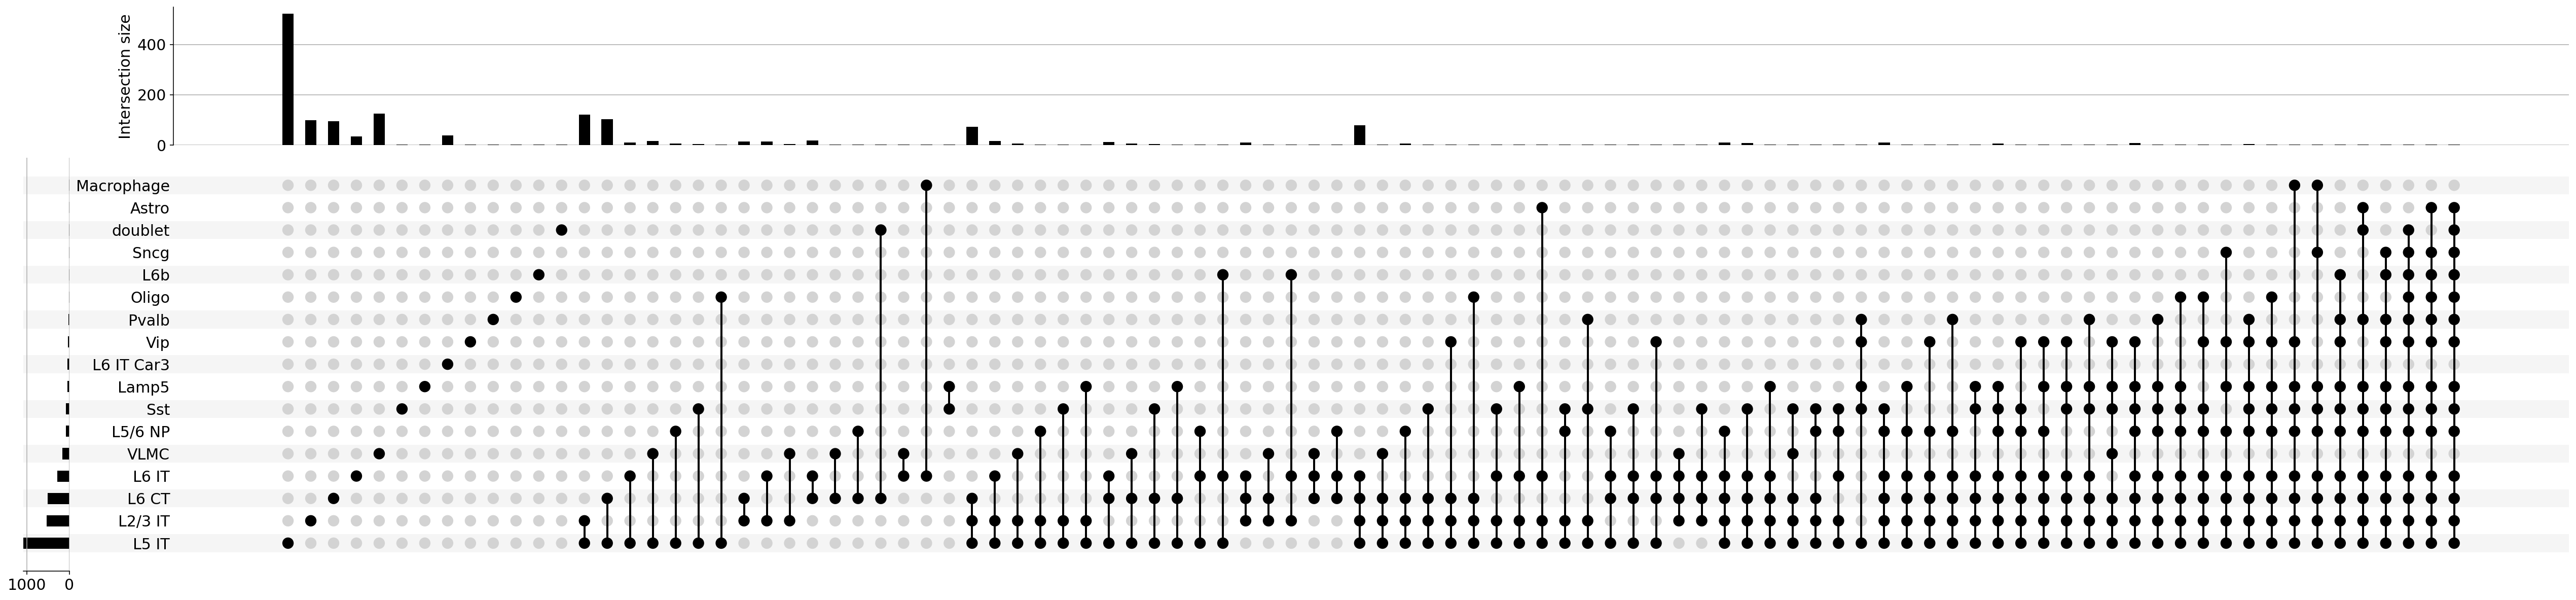

In [57]:
fig = plt.figure()
ax = upsetplot.plot(data, fig=fig)
#fig.savefig(trackfig("../../figures/10x_gene_upset_sex.png", TRACKFIG, NB), bbox_inches='tight', dpi=300)
fig.show()

In [58]:
markers_gene["es"] = markers_gene.es.values.astype(float)
markers_gene["p_corr"] = markers_gene.p_corr.values.astype(float)

In [59]:
fmg = markers_gene[markers_gene.n_cells>0.05*gene.shape[0]]

In [60]:
keep = (fmg.cluster.value_counts()>50)

keep = keep[keep.values].index

new = fmg[fmg.cluster.isin(keep)]

idx = new.groupby("cluster")["p_corr"].nsmallest(10).reset_index(level=0, drop=True).index

new.loc[idx].groupby("cluster")["es"].mean().sort_values()

cluster
L6 IT      0.429604
L6 CT      0.432723
L2/3 IT    0.477393
L5 IT      0.483904
Name: es, dtype: float64

In [61]:
fmg.cluster.value_counts()

L5 IT      1076
L2/3 IT     532
L6 CT       508
L6 IT       277
Name: cluster, dtype: int64

In [71]:
d = {
    "name": markers_gene.query("cluster == 'L5 IT' and index=='M'").sort_values("p_corr").name.values,
    "rank": np.arange(markers_gene.query("cluster == 'L5 IT' and index=='M'").shape[0])
}
tx = pd.DataFrame(d)

In [72]:
tx

,name,rank
0,Npffr1_ENSMUSG00000020090,0
1,EU599041_ENSMUSG00000074887,1
2,Gm48657_ENSMUSG00000112477,2
3,Gm10600_ENSMUSG00000083929,3
4,Shank1_ENSMUSG00000038738,4
...,...,...
893,Ccdc85b_ENSMUSG00000095098,893
894,Akap9_ENSMUSG00000040407,894
895,Phf24_ENSMUSG00000036062,895
896,Cdip1_ENSMUSG00000004071,896


In [84]:
markers_gene[markers_gene.name.str.contains("Shank")].sort_values("p_corr")

,index,name,p_raw,p_corr,es,cluster,n_cells,chromosome
34897,M,Shank1_ENSMUSG00000038738,8.76702e-258,2.125126e-254,0.193384,L5 IT,10084,7
34897,M,Shank1_ENSMUSG00000038738,9.94286e-98,2.449922e-94,0.178407,L6 CT,5886,7
34897,M,Shank1_ENSMUSG00000038738,2.94529e-86,8.726884e-83,0.164857,L2/3 IT,3722,7
34897,M,Shank1_ENSMUSG00000038738,1.94259e-40,5.868567e-37,0.184369,L6 IT,1841,7
36157,M,Shank2_ENSMUSG00000037541,2.96979e-23,7.198763e-20,0.237177,L5 IT,10084,7
34897,M,Shank1_ENSMUSG00000038738,1.43755e-19,2.538706e-16,0.213362,Lamp5,699,7
34897,M,Shank1_ENSMUSG00000038738,1.03369e-17,9.406622e-15,0.216200,Vip,1019,7
34897,M,Shank1_ENSMUSG00000038738,1.51799e-17,2.844718e-14,0.184605,L5/6 NP,1136,7
34897,M,Shank1_ENSMUSG00000038738,2.97358e-13,7.011700e-10,0.153565,Sst,871,7
36157,M,Shank2_ENSMUSG00000037541,3.9908e-12,9.833328e-09,0.249455,L6 CT,5886,7


In [75]:
tx.to_csv("../../data/notebook/revision/10x_l5it_sex.csv")